# Seaborn

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

Populating the interactive namespace from numpy and matplotlib


## Plotting univariate distributions ##

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

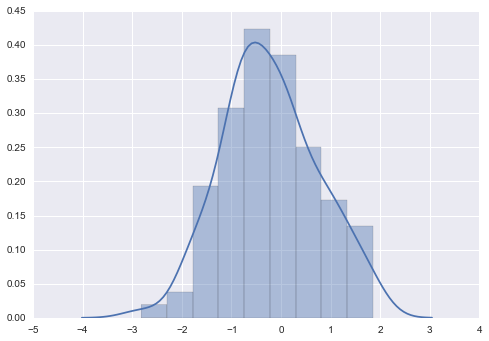

In [2]:
x = randn(100)
sns.distplot(x);

## Histograms

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

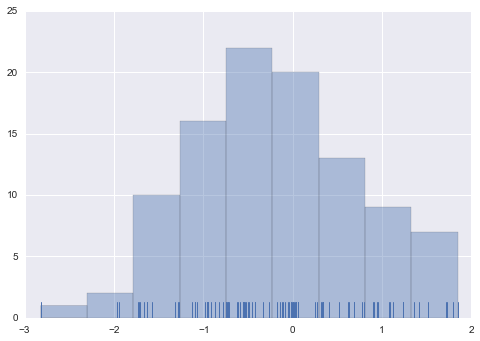

In [3]:
sns.distplot(x, kde=False, rug=True);

## Fitting parametric distributions

You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

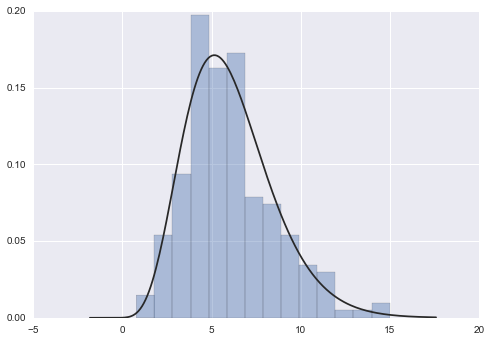

In [4]:
x = np.random.gamma(6, size=200)
p=sns.distplot(x, kde=False, fit=stats.gamma);

In [23]:
sns.distplot??

In [5]:
params=stats.gamma.fit(x)

In [6]:
params

(7.530973994696085, -0.72353853732497986, 0.90052555277990742)

In [7]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
